In [77]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import seaborn as sbn
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier as moc
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import recall_score as rcs
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import confusion_matrix as cnm
from sklearn.metrics import multilabel_confusion_matrix as mtlcnm

Performance evaluation:
    Best parameters: {'C': 1, 'max_iter': 50}
    Accuracy: 0.8
    Recall: 0.83
    F1-Score: 0.79
    AUC-ROC: 0.80


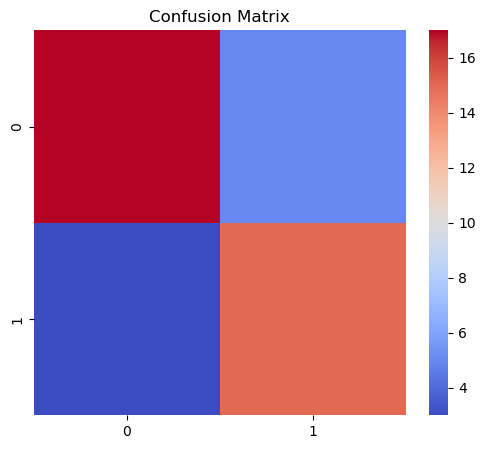

In [78]:
#Task 1
dat = pnd.read_csv('classification_dataset.csv')
x = dat.drop('Target', axis=1)
y = dat['Target']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=3)
md = lgr()
grid = gscv(estimator=md, param_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 200, 300, 400]
}, cv=5)
grid.fit(xtrain, ytrain)
bestpar = grid.best_params_
bestmd = grid.best_estimator_
pred = bestmd.predict(xtest)
print('Performance evaluation:')
print('    Best parameters:', bestpar)
print('    Accuracy:', acs(ytest, pred))
print('    Recall: {:.2f}'.format(rcs(ytest, pred)))
print('    F1-Score: {:.2f}'.format(f1(ytest, pred)))
print('    AUC-ROC: {:.2f}'.format(ras(ytest, pred)))
ppl.figure(figsize=(6, 5))
sbn.heatmap(cnm(ytest, pred), annot=False, fmt='d', cmap='coolwarm')
ppl.title('Confusion Matrix')
ppl.show(close=None, block=None)

Performance evaluation for RandomForestClassifier:
    Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
    Accuracy: 0.7
    Recall: 0.70
    F1-Score: 0.70


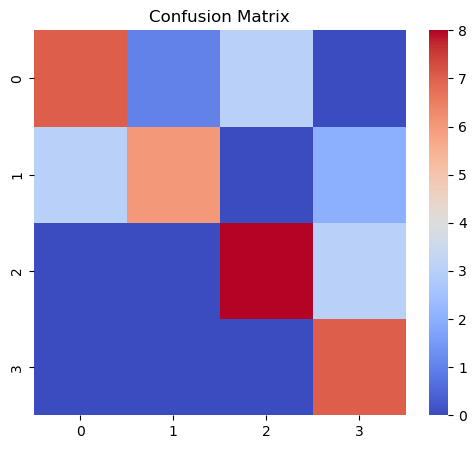

Performance evaluation for SVC:
    Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
    Accuracy: 0.675
    Recall: 0.68
    F1-Score: 0.67


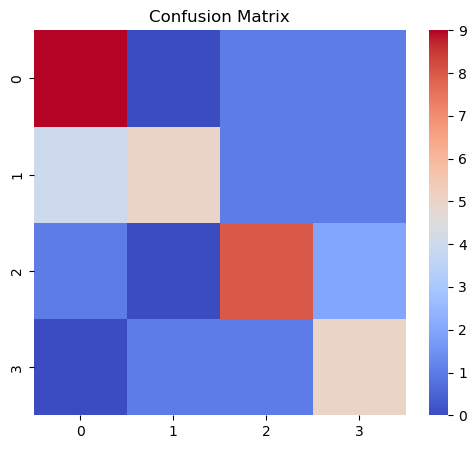

Performance evaluation for LogisticRegression:
    Best parameters: {'C': 0.1, 'max_iter': 50}
    Accuracy: 0.725
    Recall: 0.72
    F1-Score: 0.72


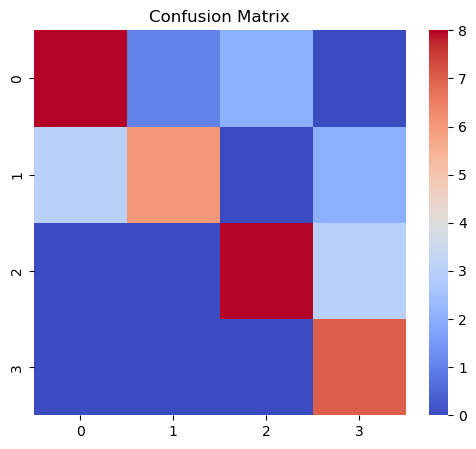

In [79]:
#Task 2
data = pnd.read_csv('multiclass_dataset.csv')
x = data.drop('Target', axis=1)
y = data['Target']
xtrainn, xtestt, ytrainn, ytestt = tts(x, y, test_size=0.2, random_state=3)
mdlrfc = rfc(random_state=3)
mdlsvc = SVC()
mdl = lgr()
gridsrfc = gscv(estimator=mdlrfc, param_grid={
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [50, 100, 150]
}, cv=5)
gridsrfc.fit(xtrainn, ytrainn)
bestparrfc = gridsrfc.best_params_
bestmdlrfc = gridsrfc.best_estimator_
predrfc = bestmdlrfc.predict(xtestt)
print('Performance evaluation for RandomForestClassifier:')
print('    Best parameters:', bestparrfc)
print('    Accuracy:', acs(ytestt, predrfc))
print('    Recall: {:.2f}'.format(rcs(ytestt, predrfc, average='weighted')))
print('    F1-Score: {:.2f}'.format(f1(ytestt, predrfc, average='weighted')))
ppl.figure(figsize=(6, 5))
sbn.heatmap(cnm(ytestt, predrfc), annot=False, fmt='d', cmap='coolwarm')
ppl.title('Confusion Matrix')
ppl.show(close=None, block=None)
gridssvc = gscv(estimator=mdlsvc, param_grid={
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}, cv=5)
gridssvc.fit(xtrainn, ytrainn)
bestparsvc = gridssvc.best_params_
bestmdlsvc = gridssvc.best_estimator_
predsvc = bestmdlsvc.predict(xtestt)
print('Performance evaluation for SVC:')
print('    Best parameters:', bestparsvc)
print('    Accuracy:', acs(ytestt, predsvc))
print('    Recall: {:.2f}'.format(rcs(ytestt, predsvc, average='weighted')))
print('    F1-Score: {:.2f}'.format(f1(ytestt, predsvc, average='weighted')))
ppl.figure(figsize=(6, 5))
sbn.heatmap(cnm(ytestt, predsvc), annot=False, fmt='d', cmap='coolwarm')
ppl.title('Confusion Matrix')
ppl.show(close=None, block=None)
gridd = gscv(estimator=mdl, param_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 200, 300, 400]
}, cv=5)
gridd.fit(xtrainn, ytrainn)
bestparr = gridd.best_params_
bestmdl = gridd.best_estimator_
predd = bestmdl.predict(xtestt)
print('Performance evaluation for LogisticRegression:')
print('    Best parameters:', bestparr)
print('    Accuracy:', acs(ytestt, predd))
print('    Recall: {:.2f}'.format(rcs(ytestt, predd, average='weighted')))
print('    F1-Score: {:.2f}'.format(f1(ytestt, predd, average='weighted')))
ppl.figure(figsize=(6, 5))
sbn.heatmap(cnm(ytestt, predd), annot=False, fmt='d', cmap='coolwarm')
ppl.title('Confusion Matrix')
ppl.show(close=None, block=None)

Performance evaluation:
    Best parameters: {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 150}
    Accuracy: 0.475
    Recall:  [0.4        0.86363636 0.7        0.77272727]
    F1-Score:  [0.53333333 0.84444444 0.73684211 0.82926829]


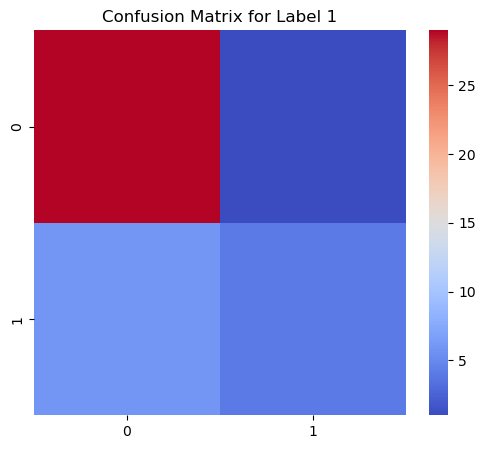

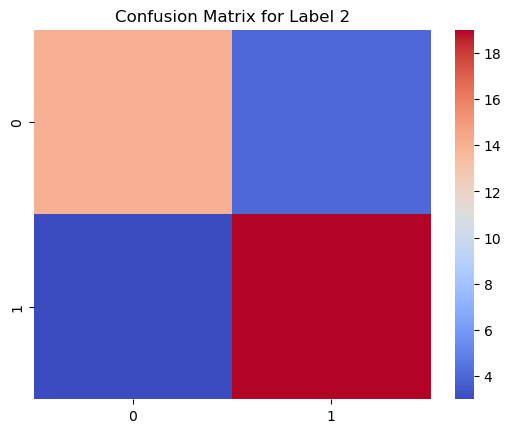

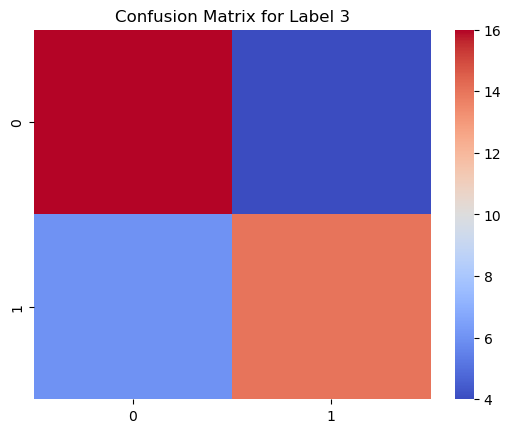

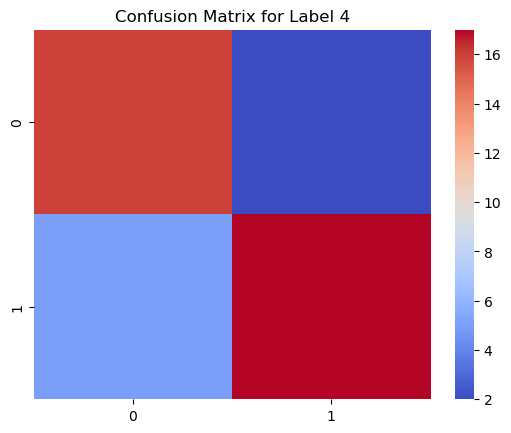

In [80]:
#Task 3
dataa = pnd.read_csv('multilabel_dataset.csv')
x = dataa[['Feature1', 'Feature2', 'Feature3']]
y = dataa[['Label1', 'Label2', 'Label3', 'Label4']]
xtraiinn, xtesstt, ytraiinn, ytesstt = tts(x, y, test_size=0.2, random_state=3)
model = moc(rfc(random_state=3))
grids = gscv(estimator=model, param_grid={
    'estimator__max_depth': [10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__n_estimators': [50, 100, 150]
}, cv=5)
grids.fit(xtraiinn, ytraiinn)
bestparams = grids.best_params_
bestmodel = grids.best_estimator_
preedd = bestmodel.predict(xtesstt)
confusion = mtlcnm(ytesstt, preedd)
print('Performance evaluation:')
print('    Best parameters:', bestparams)
print('    Accuracy:', acs(ytesstt, preedd))
print('    Recall: ',(rcs(ytesstt, preedd, average=None)))
print('    F1-Score: ',(f1(ytesstt, preedd, average=None)))
ppl.figure(figsize=(6, 5))
for i, conf in enumerate(confusion, start=1):
    sbn.heatmap(conf, annot=False, fmt='d', cmap='coolwarm')
    ppl.title(f'Confusion Matrix for Label {i}')
    ppl.show(close=None, block=None)